## In this notebook, we proceed to do the count vectorization, tf-idf and lda analysis of the topics present in both White House and European Commission

## Structure:
    - Hello is it me you are looking for? by Leonel Richie
    - Atomic by Blondie
    - First we take Manhanttan by Leonard Cohen

## Import functions

In [1]:
import pandas as pd
import numpy as np
import csv

import spacy
sp = spacy.load('en_core_web_sm')

from matplotlib import pyplot as plt
from sklearn.feature_extraction.text import TfidfTransformer, CountVectorizer, TfidfVectorizer
from sklearn.decomposition import TruncatedSVD

import os

from gensim.corpora.dictionary import Dictionary
from gensim import models
from sklearn.feature_extraction.text import CountVectorizer
from scipy.sparse import csr_matrix
from gensim.matutils import Sparse2Corpus

from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
from sklearn.decomposition import TruncatedSVD
from scipy.sparse import csr_matrix
from gensim.matutils import Sparse2Corpus
from gensim.corpora import Dictionary
from gensim import models

import matplotlib.pyplot as plt



## Load Data

In [2]:
path="/Users/ruimaciel/Desktop/Barcelona/NLP_I/NLP-Project/"
filename_EC ="data/theeuropeancommission_preprocessed.csv"
EC_data = pd.read_csv(os.path.join(path, filename_EC), sep=',', encoding='utf-8')
#Checking everything is fine
EC_data.head(5)

,Title,Date,Category,Text,text_preproc,titles_preproc,Ukraine
0,European Commission authorises second safe and...,2021-01-06,Press Release,"Today, the European Commission has granted a c...",today european commission grant conditional ma...,european commission authorise second safe effe...,0
1,Statement by President von der Leyen on the re...,2021-01-07,Statement,What happened in Washington yesterday is as ...,happen washington yesterday appalling outrageo...,statement president von der leyen recent devel...,0
2,Commission proposes to purchase up to 300 mill...,2021-01-08,Press Release,The European Commission today proposed to the ...,european commission today propose EU member st...,commission propose purchase 300 million additi...,0
3,Speech by President von der Leyen at the One P...,2021-01-11,Speech,"Merci Monsieur le Président.\nCher Emmanuel,\n...",merci monsieur le président cher emmanuel deli...,speech president von der leyen one planet summit,0
4,Coronavirus: Commission concludes exploratory ...,2021-01-12,Press Release,"Today, the European Commission concluded explo...",today european commission conclude exploratory...,coronavirus commission conclude exploratory ta...,0


In [3]:
filename ="data/thewhitehouse_preprocessed_p1.csv"
WH_data_1 = pd.read_csv(os.path.join(path, filename), sep=',', encoding='utf-8')
filename ="data/thewhitehouse_preprocessed_p2.csv"
WH_data_2 = pd.read_csv(os.path.join(path, filename), sep=',', encoding='utf-8')
WH_data = pd.concat([WH_data_1, WH_data_2], ignore_index=True)
#Checking everything is fine
WH_data.head(5)

,Title,Date,Category,Text,text_preproc,titles_preproc,Ukraine
0,Fact Sheet: President-elect Biden Outlines COV...,2021-01-15,Statement,Effectively and equitably vaccinating the U.S....,effectively equitably vaccinate US population ...,fact sheet president elect biden outlines covi...,0
1,Fact Sheet: List of Agency Actions for Review,2021-01-20,Statement,"Actions Address the COVID-19 Pandemic, Provide...",actions address covid19 pandemic provide econo...,fact sheet list agency actions review,0
2,Fact Sheet: President Biden Sends Immigration ...,2021-01-20,Statement,The U.S. Citizenship Act of 2021 establishes a...,US citizenship act 2021 establish new system r...,fact sheet president biden sends immigration b...,0
3,"A Letter to Dr. Eric S. Lander, the President’...",2021-01-20,Statement,"On January 15, 2021, then-President-Elect Bide...",january 15 2021 president elect biden send fol...,letter dr eric lander president science adviso...,0
4,Paris Climate Agreement,2021-01-20,Statement,ACCEPTANCE ON BEHALF OF THE UNITED STATES OF A...,acceptance ON BEHALF UNITED STATES AMERICA jos...,paris climate agreement,0


In [4]:
#Create a column named "European Commission" with the value 1
EC_data['is_EC'] = 1
#Create a column named
WH_data['is_EC'] = 0
joint_data=pd.concat([EC_data, WH_data], ignore_index=True)
joint_data

,Title,Date,Category,Text,text_preproc,titles_preproc,Ukraine,is_EC
0,European Commission authorises second safe and...,2021-01-06,Press Release,"Today, the European Commission has granted a c...",today european commission grant conditional ma...,european commission authorise second safe effe...,0,1
1,Statement by President von der Leyen on the re...,2021-01-07,Statement,What happened in Washington yesterday is as ...,happen washington yesterday appalling outrageo...,statement president von der leyen recent devel...,0,1
2,Commission proposes to purchase up to 300 mill...,2021-01-08,Press Release,The European Commission today proposed to the ...,european commission today propose EU member st...,commission propose purchase 300 million additi...,0,1
3,Speech by President von der Leyen at the One P...,2021-01-11,Speech,"Merci Monsieur le Président.\nCher Emmanuel,\n...",merci monsieur le président cher emmanuel deli...,speech president von der leyen one planet summit,0,1
4,Coronavirus: Commission concludes exploratory ...,2021-01-12,Press Release,"Today, the European Commission concluded explo...",today european commission conclude exploratory...,coronavirus commission conclude exploratory ta...,0,1
...,...,...,...,...,...,...,...,...
8919,Readout of National Security Advisor Jake Sull...,2023-12-29,Statement,National Security Advisor Jake Sullivan spoke ...,national security advisor jake sullivan speak ...,readout national security advisor jake sulliva...,0,0
8920,Statement from President Joe Biden on Russia’s...,2023-12-29,Statement,"Overnight, Russia launched its largest aerial ...",overnight russia launch large aerial assault u...,statement president joe biden russia aerial as...,1,0
8921,FACT SHEET: Biden-⁠Harris Administration Relea...,2023-12-30,Statement,The Biden-Harris Administration continues to p...,biden harris administration continue prioritiz...,fact sheet BidenHarris administration releases...,1,0
8922,Statement from President Joe Biden on the Pass...,2023-12-31,Statement,"Eddie Bernice Johnson was a dedicated nurse, s...",eddie bernice johnson dedicated nurse state le...,statement president joe biden passing former c...,0,0


## CV, TD-IDF and LDA - Goal choose Min_DF, Max_DF to for LDA Topic Analysis

In [5]:

def analyze_text_data(data, min_df, max_df):
    # Previous setup for CountVectorizer and TfidfVectorizer
    
    # Initialize CountVectorizer with specified parameters
    cv = CountVectorizer(ngram_range=(1,2), lowercase=True, min_df=min_df, max_df=max_df, stop_words='english')
    
    # Fit CountVectorizer and transform text and title data
    cv.fit(data.text_preproc)
    vectorized_text = cv.transform(data.text_preproc).toarray()
    vectorized_title = cv.transform(data.titles_preproc).toarray()
    vectorized_text_title_weight = 2 * vectorized_title + vectorized_text
    
    # Apply SVD to CountVectorizer output
    svd = TruncatedSVD(n_components=10)
    U = svd.fit_transform(vectorized_text_title_weight)
    VT = svd.components_
    
    # Initialize TfidfVectorizer with specified parameters
    tfidf = TfidfVectorizer(ngram_range=(1,2), min_df=min_df, max_df=max_df)
    
    # Fit and transform text data using TfidfVectorizer
    tfidf.fit(data.text_preproc)  # Adjusted to fit the correct dataset
    tfidf_matrix_text = tfidf.transform(data.text_preproc)
    tfidf_matrix_title = tfidf.transform(data.titles_preproc)
    
    # Perform SVD on TF-IDF matrices
    svd_tfidf = TruncatedSVD(n_components=10)
    U_text = svd_tfidf.fit_transform(tfidf_matrix_text)
    U_title = svd_tfidf.transform(tfidf_matrix_title)
    
    # LDA Analysis
    dtm = 2 * vectorized_title + vectorized_text  # Reuse weighted document-term matrix
    dtm_sparse = csr_matrix(dtm)  # Convert to sparse format for gensim
    corpus = Sparse2Corpus(dtm_sparse, documents_columns=False)  # Convert to gensim corpus
    dictionary = Dictionary.from_corpus(corpus, id2word=dict((id, word) for word, id in cv.vocabulary_.items()))
    
    # Build LDA model
    lda_model = models.LdaModel(corpus=corpus, id2word=dictionary, num_topics=10, passes=10, random_state=10)
    
    # Collect top words for LDA
    lda_output = "Top words associated with each topic (LDA):\n"
    topics = lda_model.show_topics(num_words=10, formatted=False)
    for topic_num, topic_words in topics:
        words = ', '.join([word for word, _ in topic_words])
        lda_output += f"Topic {topic_num + 1}: {words}\n"

    # Collect outputs for Count Vectorization and TF-IDF Vectorization
    count_vectorization_output = ""
    tfidf_vectorization_output = ""
    
    # Collect top words for Count Vectorization
    count_vectorization_output += "Top words associated with each topic (Count Vectorization):\n"
    feature_names_count = cv.get_feature_names_out()
    for topic_idx, topic in enumerate(VT):
        top_words_idx = topic.argsort()[::-1][:10]  # Get indices of top 10 words
        top_words = [feature_names_count[i] for i in top_words_idx]
        count_vectorization_output += f"Topic {topic_idx+1}: {', '.join(top_words)}\n"
    
    # Collect top words for TF-IDF Vectorization
    tfidf_vectorization_output += "\nTop words associated with each topic (TF-IDF Vectorization):\n"
    feature_names_tfidf = tfidf.get_feature_names_out()
    for topic_idx, topic in enumerate(svd_tfidf.components_):
        top_words_idx = topic.argsort()[::-1][:10]  # Get indices of top 10 words
        top_words = [feature_names_tfidf[i] for i in top_words_idx]
        tfidf_vectorization_output += f"Topic {topic_idx+1}: {', '.join(top_words)}\n"    
    
    # Return all the collected outputs
    return count_vectorization_output, tfidf_vectorization_output, lda_output

In [6]:
def run_and_log_analyses(min_df_values, max_df_values, datasets, output_file_name):
    with open(output_file_name, "w") as file:
        for dataset_name, data in datasets.items():
            file.write(f"Analyzing dataset: {dataset_name}\n\n")
            for min_df in min_df_values:
                for max_df in max_df_values:
                    # Call analyze_text_data and unpack the returned outputs
                    count_vectorization_output, tfidf_vectorization_output, lda_output = analyze_text_data(data, min_df, max_df)
                    
                    file.write(f"min_df: {min_df}, max_df: {max_df}\n")
                    file.write(count_vectorization_output + "\n")
                    file.write(tfidf_vectorization_output + "\n")
                    file.write(lda_output + "\n\n")
            file.write("\n")  # Separator between datasets
    print(f"Analysis completed. Output written to {output_file_name}")


    

In [7]:
min_df_values = [0.005, 0.01, 0.05, 0.1]
max_df_values = [0.2, 0.3]

min_df_values_2 = [0.005, 0.01, 0.05, 0.1]
max_df_values_2 = [0.4, 0.5, 0.6]

datasets = {
    "joint_data": joint_data
}

# run_and_log_analyses(min_df_values, max_df_values, datasets, "analysis_output_1.txt")
# run_and_log_analyses(min_df_values_2, max_df_values_2, datasets, "analysis_output_2.txt")


Analysis completed. Output written to analysis_output_1.txt
Analysis completed. Output written to analysis_output_2.txt


## Topics analysis

In [9]:
def analyze_text_with_lda(data, min_df, max_df):
    # Initialize CountVectorizer
    cv = CountVectorizer(ngram_range=(1, 2), lowercase=False, min_df=min_df, max_df=max_df)
    
    # Fit CountVectorizer and transform text data
    cv.fit(data.text_preproc)
    vectorized_text = cv.transform(data.text_preproc).toarray()
    vectorized_title = cv.transform(data.titles_preproc).toarray()

    # Combine text and title vectorized data with specified weight
    dtm = 2 * vectorized_title + vectorized_text

    # Convert the combined DTM to a sparse format for gensim
    dtm_sparse = csr_matrix(dtm)

    # Convert sparse matrix to gensim corpus
    corpus = Sparse2Corpus(dtm_sparse, documents_columns=False)

    # Create a Gensim dictionary from the CountVectorizer vocabulary
    dictionary = Dictionary()
    cv_vocabulary = {id_: token for token, id_ in cv.vocabulary_.items()}
    # Manually populate the Dictionary object
    dictionary.id2token = cv_vocabulary
    dictionary.token2id = {token: id_ for id_, token in cv_vocabulary.items()}

    # Hardcoded parameters for LDA
    num_topics = 10
    passes = 10
    random_state = 10

    # Build LDA model
    lda_model = models.LdaModel(corpus=corpus, id2word=dictionary, num_topics=num_topics, passes=passes, random_state=random_state)

    # Display the topics
    print("Top words associated with each topic (LDA):")
    topics = lda_model.show_topics(num_words=10, formatted=False)
    for topic_num, topic_words in topics:
        words = ', '.join([word for word, _ in topic_words])
        print(f"Topic {topic_num + 1}: {words}")

    return lda_model, corpus, cv



In [12]:
#We choose one lda and then role it, this is for text purposes
lda_model_joint, corpus_joint, cv = analyze_text_with_lda(joint_data, 0.1, 0.5)

Top words associated with each topic (LDA):
Topic 1: security, US, global, partnership, pacific, economic, technology, national, cooperation, commitment
Topic 2: serve, national, university, member, director, US, house, secretary, department, law
Topic 3: right, woman, thank, vice president, nation, vice, fight, many, leader, family
Topic 4: go, know, get, say, think, thank, want, look, thing, time
Topic 5: community, administration, program, health, federal, provide, million, department, access, service
Topic 6: ukraine, russia, war, minister, security, prime, prime minister, president biden, military, russian
Topic 7: vaccine, get, health, thank, day, COVID19, question, know, pandemic, week
Topic 8: go, say, know, see, would, think, get, question, right, want
Topic 9: energy, climate, european, investment, EU, clean, global, resilience, europe, commission
Topic 10: job, cost, pay, american, investment, america, million, economy, worker, infrastructure


# Trend Analysis for the Joint Communication

In [35]:
def aggregate_topic_shares(data, lda_model, corpus):
    # Get document topics
    doc_topics = [lda_model.get_document_topics(item, minimum_probability=0.0000001) for item in corpus]
    
    # Initialize topic columns in EC_data
    for topic_num in range(10):
        data[f'topic_{topic_num}'] = 0.0
    
    # Fill topic share in EC_data
    for i, doc_distribution in enumerate(doc_topics):
        for topic_num, prob in doc_distribution:
            data.at[i, f'topic_{topic_num}'] = prob
    
    # Calculate sum of topic shares and check if it's close to 1
    data['topic_sum'] = data[[f'topic_{i}' for i in range(10)]].sum(axis=1)
    data['sum_is_1'] = np.isclose(data['topic_sum'], 1.0)
    
    # Calculate words per topic
    data['length_in_words'] = data['text_preproc'].apply(lambda x: len(x.split()))
    for i in range(10):
        data[f'words_topic_{i}'] = data[f'topic_{i}'] * data['length_in_words']
    
    # Correctly convert the 'Date' column to 'year_month' format
    data['year_month'] = pd.to_datetime(data['Date']).dt.strftime('%Y-%m')
    aggregation_data = data[['year_month'] + [f'words_topic_{i}' for i in range(10)]]
    grouped_data = aggregation_data.groupby(['year_month']).sum().reset_index()
    
    # Adjust sums by alpha_prior and calculate topic shares
    alpha_prior = lda_model.alpha
    total_alpha_prior = sum(alpha_prior)
    for i in range(10):
        grouped_data[f'topic_share_{i}'] = (grouped_data[f'words_topic_{i}'] + alpha_prior[i]) / (grouped_data[[f'words_topic_{j}' for j in range(10)]].sum(axis=1) + total_alpha_prior)
    
    # Select final columns for the result DataFrame
    final_columns = ['year_month'] + [f'topic_share_{i}' for i in range(10)]
    result_df = grouped_data[final_columns]
    
    return result_df

joint_topic_shares = aggregate_topic_shares(joint_data, lda_model_joint, corpus_joint)

In [36]:
joint_topic_shares.head(5)

,year_month,topic_share_0,topic_share_1,topic_share_2,topic_share_3,topic_share_4,topic_share_5,topic_share_6,topic_share_7,topic_share_8,topic_share_9
0,2021-01,0.042400,0.040716,0.060013,0.082416,0.166753,0.013951,0.153877,0.289634,0.103799,0.046441
1,2021-02,0.046785,0.042748,0.047606,0.112384,0.083592,0.022749,0.248553,0.319325,0.042197,0.034060
2,2021-03,0.040608,0.047990,0.070968,0.102730,0.083270,0.012337,0.246208,0.294252,0.039057,0.062581
3,2021-04,0.048331,0.110769,0.059318,0.081548,0.098032,0.022927,0.177407,0.258625,0.047856,0.095188
4,2021-05,0.068318,0.031034,0.063900,0.131025,0.087833,0.027628,0.187464,0.260855,0.061653,0.080291


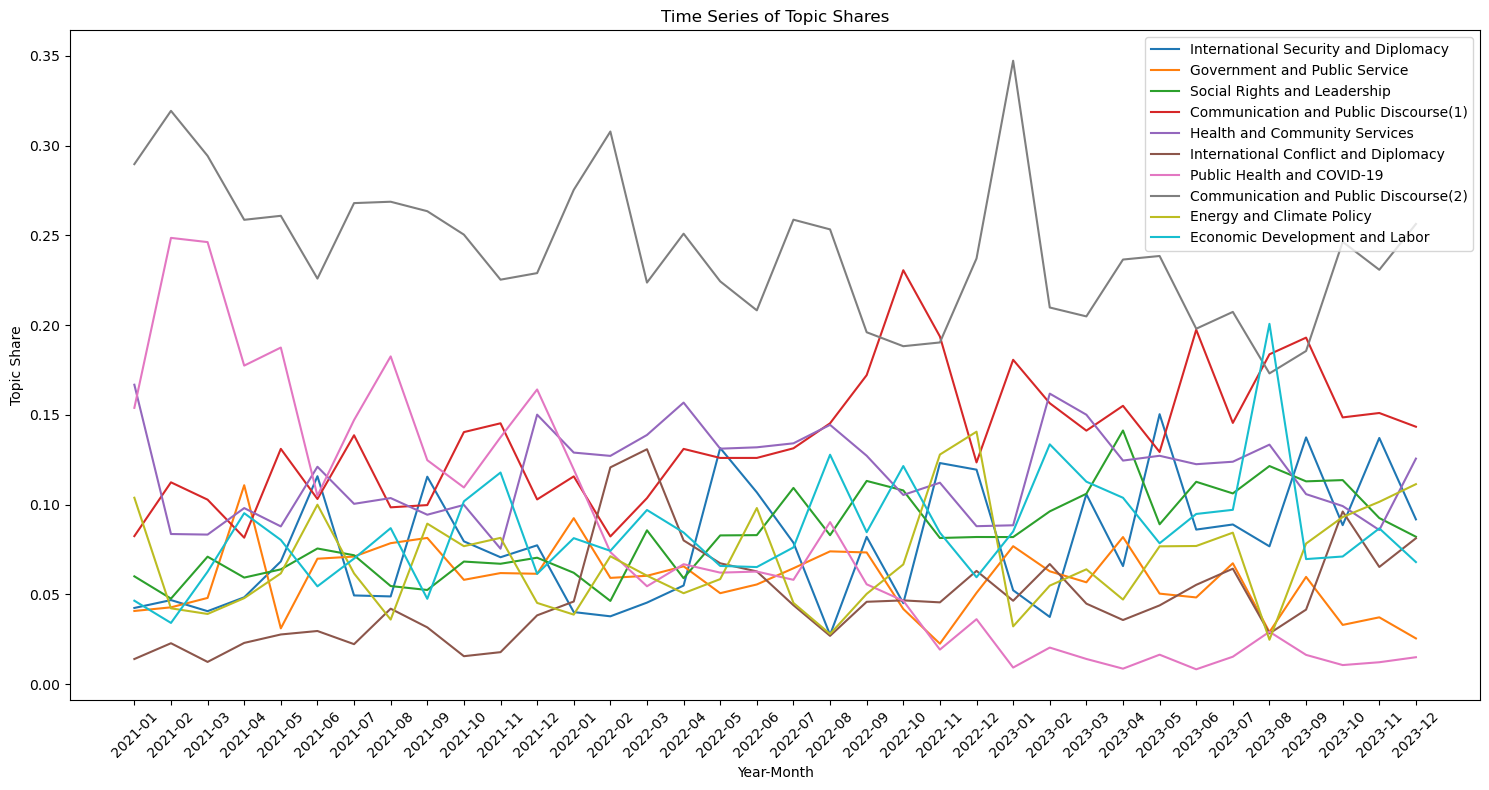

In [83]:
# Define new legend names (adjusted to match 0-indexing used by Python)
new_legend_names = {
    0: 'International Security and Diplomacy',
    1: 'Government and Public Service',
    2: 'Social Rights and Leadership',
    3: 'Communication and Public Discourse(1)',
    4: 'Health and Community Services',
    5: 'International Conflict and Diplomacy',
    6: 'Public Health and COVID-19',
    7: 'Communication and Public Discourse(2)',
    8: 'Energy and Climate Policy',
    9: 'Economic Development and Labor'
}

# Plotting each topic share as a separate line in the time series
plt.figure(figsize=(15, 8))
for i, column in enumerate(joint_topic_shares.columns):
    plt.plot(joint_topic_shares.index, joint_topic_shares[column], label=new_legend_names[i])

# Adding legend outside the plot
plt.legend(loc='upper right')
# Adding title and labels
plt.title('Time Series of Topic Shares')
plt.xlabel('Year-Month')
plt.ylabel('Topic Share')

# Rotate x-axis labels for better readability
plt.xticks(rotation=45)

# Show plot
plt.tight_layout()  # Adjust layout to make room for the legend
plt.show()

In [55]:
#Save the data into csv if needed to plot or do regressions
joint_topic_shares.to_csv('data/joint_topic_shares.csv')

# Let's analyze the contribution of both to this joint dataset

In [62]:
joint_data

,Title,Date,Category,Text,text_preproc,titles_preproc,Ukraine,is_EC,topic_0,topic_1,...,words_topic_1,words_topic_2,words_topic_3,words_topic_4,words_topic_5,words_topic_6,words_topic_7,words_topic_8,words_topic_9,year_month
0,European Commission authorises second safe and...,2021-01-06,Press Release,"Today, the European Commission has granted a c...",today european commission grant conditional ma...,european commission authorise second safe effe...,0,1,0.000394,0.000394,...,0.193026,0.192971,0.192964,14.447021,0.192985,285.405043,0.192976,188.797049,0.192966,2021-01
1,Statement by President von der Leyen on the re...,2021-01-07,Statement,What happened in Washington yesterday is as ...,happen washington yesterday appalling outrageo...,statement president von der leyen recent devel...,0,1,0.331319,0.001539,...,0.113886,36.279525,0.113894,0.113877,0.113892,0.113894,4.993958,7.525604,0.113891,2021-01
2,Commission proposes to purchase up to 300 mill...,2021-01-08,Press Release,The European Commission today proposed to the ...,european commission today propose EU member st...,commission propose purchase 300 million additi...,0,1,0.001429,0.001429,...,0.132879,0.132874,0.132877,0.132896,0.132881,50.843216,0.132883,41.093722,0.132888,2021-01
3,Speech by President von der Leyen at the One P...,2021-01-11,Speech,"Merci Monsieur le Président.\nCher Emmanuel,\n...",merci monsieur le président cher emmanuel deli...,speech president von der leyen one planet summit,0,1,0.067196,0.000389,...,0.180210,40.790621,100.865336,0.180228,0.180229,59.781218,0.180222,229.550041,0.180217,2021-01
4,Coronavirus: Commission concludes exploratory ...,2021-01-12,Press Release,"Today, the European Commission concluded explo...",today european commission conclude exploratory...,coronavirus commission conclude exploratory ta...,0,1,0.000300,0.000299,...,0.155437,0.155429,0.155436,0.155452,0.155431,269.897499,0.155438,247.858952,0.155459,2021-01
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8919,Readout of National Security Advisor Jake Sull...,2023-12-29,Statement,National Security Advisor Jake Sullivan spoke ...,national security advisor jake sullivan speak ...,readout national security advisor jake sulliva...,0,0,0.002042,0.472497,...,27.404855,0.118382,0.118386,0.118391,29.648024,0.118391,0.118402,0.118381,0.118382,2023-12
8920,Statement from President Joe Biden on Russia’s...,2023-12-29,Statement,"Overnight, Russia launched its largest aerial ...",overnight russia launch large aerial assault u...,statement president joe biden russia aerial as...,1,0,0.000935,0.000935,...,0.167325,34.939410,2.819181,0.167351,133.028469,0.167367,0.167349,0.167341,7.208873,2023-12
8921,FACT SHEET: Biden-⁠Harris Administration Relea...,2023-12-30,Statement,The Biden-Harris Administration continues to p...,biden harris administration continue prioritiz...,fact sheet BidenHarris administration releases...,1,0,0.510459,0.000251,...,0.162973,0.162952,0.162944,280.040470,3.820429,33.362657,0.162949,0.162967,0.162959,2023-12
8922,Statement from President Joe Biden on the Pass...,2023-12-31,Statement,"Eddie Bernice Johnson was a dedicated nurse, s...",eddie bernice johnson dedicated nurse state le...,statement president joe biden passing former c...,0,0,0.001087,0.158356,...,23.119947,87.855668,0.158756,0.158755,0.158731,0.158748,0.158743,0.158763,33.913119,2023-12


In [63]:
# Assuming `joint_data` is a pandas DataFrame containing your combined dataset
ec_data = joint_data[joint_data['is_EC'] == 1]
wh_data = joint_data[joint_data['is_EC'] == 0]


In [65]:
# Vectorize EC data
vectorized_text_ec = cv.transform(ec_data.text_preproc).toarray()

vectorized_title_ec = cv.transform(ec_data.titles_preproc).toarray()
dtm_ec = 2 * vectorized_title_ec + vectorized_text_ec
dtm_sparse_ec = csr_matrix(dtm_ec)

# Convert to Gensim corpus for EC
corpus_ec = Sparse2Corpus(dtm_sparse_ec, documents_columns=False)

# Repeat the process for WH data
vectorized_text_wh = cv.transform(wh_data.text_preproc).toarray()

vectorized_title_wh = cv.transform(wh_data.titles_preproc).toarray()
dtm_wh = 2 * vectorized_title_wh + vectorized_text_wh
dtm_sparse_wh = csr_matrix(dtm_wh)
corpus_wh = Sparse2Corpus(dtm_sparse_wh, documents_columns=False)


In [66]:
# Analyze topic distribution for EC data
topics_ec = lda_model_joint.get_document_topics(corpus_ec, minimum_probability=0)
avg_topic_distribution_ec = np.mean([[topic_prob for topic_id, topic_prob in doc] for doc in topics_ec], axis=0)

# Analyze topic distribution for WH data
topics_wh = lda_model_joint.get_document_topics(corpus_wh, minimum_probability=0)
avg_topic_distribution_wh = np.mean([[topic_prob for topic_id, topic_prob in doc] for doc in topics_wh], axis=0)

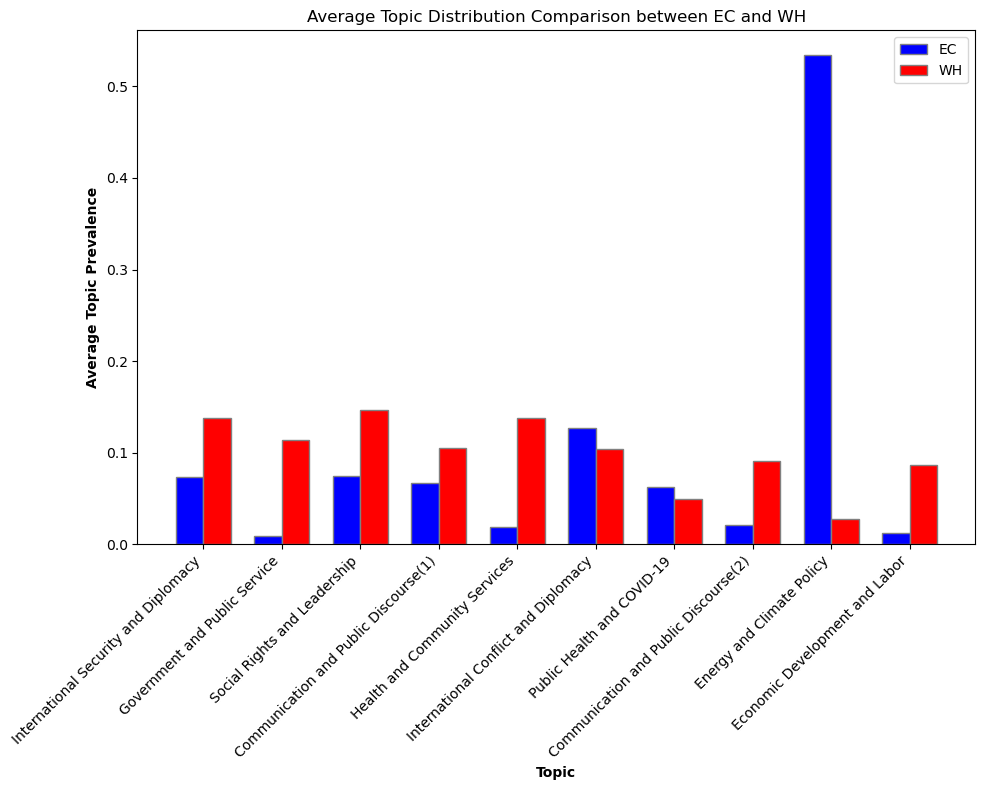

In [30]:
new_column_names = {
    1: 'International Security and Diplomacy',
    2: 'Government and Public Service',
    3: 'Social Rights and Leadership',
    4: 'Communication and Public Discourse(1)',
    5: 'Health and Community Services',
    6: 'International Conflict and Diplomacy',
    7: 'Public Health and COVID-19',
    8: 'Communication and Public Discourse(2)',
    9: 'Energy and Climate Policy',
    10: 'Economic Development and Labor'
}


# Creating the plot
plt.figure(figsize=(10, 8))  # Adjust the figure size as necessary
bar_width = 0.35  # Width of the bars

# Setting position of bar on X axis
r1 = np.arange(len(avg_topic_distribution_ec))
r2 = [x + bar_width for x in r1]

# Making the plot
plt.bar(r1, avg_topic_distribution_ec, color='b', width=bar_width, edgecolor='grey', label='EC')
plt.bar(r2, avg_topic_distribution_wh, color='r', width=bar_width, edgecolor='grey', label='WH')

# Adding labels
plt.xlabel('Topic', fontweight='bold')
plt.ylabel('Average Topic Prevalence', fontweight='bold')

# Here we set the x-tick labels with the names of the topics, rotating them 45 degrees for readability
plt.xticks([r + bar_width / 2 for r in range(len(avg_topic_distribution_ec))], 
           [new_column_names[i] for i in range(1, len(avg_topic_distribution_ec) + 1)], 
           rotation=45, ha='right')

# Creating legend & title
plt.legend()
plt.title('Average Topic Distribution Comparison between EC and WH')

# Show plot
plt.tight_layout()  # Adjust subplot parameters to give specified padding
plt.show()



# Now let's get the contribution per month for each topic

In [71]:
def analyze_data_by_month(data, cv, lda_model_joint):
    monthly_distributions = []
    for year_month, group in data.groupby('year_month'):
        vectorized_text = cv.transform(group.text_preproc).toarray()
        vectorized_title = cv.transform(group.titles_preproc).toarray()
        dtm = 2 * vectorized_title + vectorized_text
        dtm_sparse = csr_matrix(dtm)
        corpus = Sparse2Corpus(dtm_sparse, documents_columns=False)
        topics = lda_model_joint.get_document_topics(corpus, minimum_probability=0)
        avg_topic_distribution = np.mean([[topic_prob for topic_id, topic_prob in doc] for doc in topics], axis=0)
        monthly_distributions.append((year_month, avg_topic_distribution))
    return monthly_distributions

# Analyze EC data by month
ec_monthly_distributions = analyze_data_by_month(ec_data, cv, lda_model_joint)
#Analyzing WH data by month
wh_monthly_distributions = analyze_data_by_month(wh_data, cv, lda_model_joint)



In [72]:
def distributions_to_dataframe(distributions, prefix):
    # Convert distributions to a DataFrame
    columns = ['year_month'] + [f'{prefix}topic_{i}' for i in range(len(distributions[0][1]))]
    data = [{columns[0]: year_month, **{columns[i+1]: dist[i] for i in range(len(dist))}} 
            for year_month, dist in distributions]
    
    return pd.DataFrame(data, columns=columns)


In [73]:
# Transform distributions into DataFrames
ec_df = distributions_to_dataframe(ec_monthly_distributions, 'ec_')
wh_df = distributions_to_dataframe(wh_monthly_distributions, 'wh_')

# Optionally, merge EC and WH DataFrames on year_month for a side-by-side comparison
combined_df = ec_df.merge(wh_df, on='year_month')

# Export to CSV
ec_df.to_csv('data/ec_monthly_distributions.csv', index=False)
wh_df.to_csv('data/wh_monthly_distributions.csv', index=False)
combined_df.to_csv('data/combined_monthly_distributions.csv', index=False)

In [74]:
combined_df.head(5)

,year_month,ec_topic_0,ec_topic_1,ec_topic_2,ec_topic_3,ec_topic_4,ec_topic_5,ec_topic_6,ec_topic_7,ec_topic_8,...,wh_topic_0,wh_topic_1,wh_topic_2,wh_topic_3,wh_topic_4,wh_topic_5,wh_topic_6,wh_topic_7,wh_topic_8,wh_topic_9
0,2021-01,0.034586,0.012938,0.103572,0.071574,0.009041,0.060361,0.225776,0.010481,0.470926,...,0.184261,0.072538,0.110841,0.063591,0.203685,0.086287,0.086450,0.098902,0.036844,0.056602
1,2021-02,0.041193,0.000366,0.111347,0.067121,0.002775,0.031820,0.228204,0.004988,0.500046,...,0.147655,0.109289,0.105524,0.078116,0.172812,0.086239,0.130568,0.109240,0.013630,0.046928
2,2021-03,0.073951,0.004948,0.092018,0.059645,0.004498,0.053558,0.155272,0.031188,0.510563,...,0.138397,0.130631,0.139055,0.109826,0.123407,0.052129,0.124871,0.106821,0.018482,0.056381
3,2021-04,0.050792,0.011836,0.090276,0.078353,0.015711,0.037167,0.158708,0.043864,0.506974,...,0.120337,0.162048,0.123137,0.089532,0.134235,0.066117,0.103081,0.099160,0.024550,0.077803
4,2021-05,0.108294,0.001410,0.092400,0.070893,0.007578,0.050689,0.179298,0.005391,0.476196,...,0.127359,0.104156,0.137081,0.086434,0.157721,0.104551,0.091821,0.102057,0.018581,0.070240


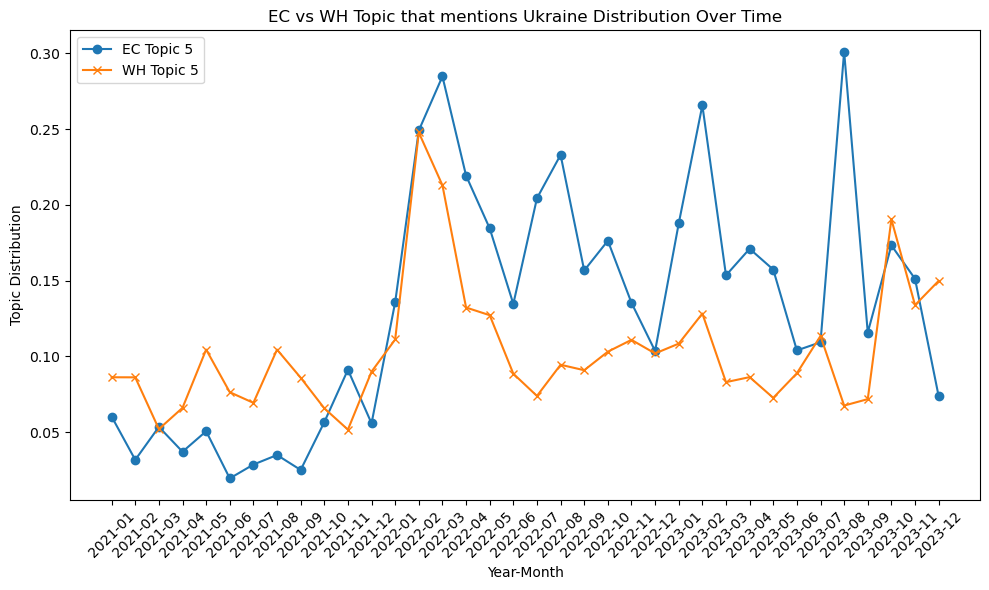

In [79]:
# Plotting ec_topic_5 vs wh_topic_5
plt.figure(figsize=(10, 6))
plt.plot(combined_df['year_month'], combined_df['ec_topic_5'], label='EC Topic 5', marker='o')
plt.plot(combined_df['year_month'], combined_df['wh_topic_5'], label='WH Topic 5', marker='x')
plt.title('EC vs WH Topic that mentions Ukraine Distribution Over Time')
plt.xlabel('Year-Month')
plt.ylabel('Topic Distribution')
plt.xticks(rotation=45)
plt.legend()
plt.tight_layout()
plt.show()

# Let's now do the same for daily

In [89]:
# Convert the 'Date' column to string format
ec_data['year_month_day'] = pd.to_datetime(ec_data['Date']).dt.strftime('%Y-%m-%d')
wh_data['year_month_day'] = pd.to_datetime(wh_data['Date']).dt.strftime('%Y-%m-%d')

# Adjust the analysis function to analyze data by day
def analyze_data_by_day(data, cv, lda_model_joint):
    daily_distributions = []
    for year_month_day, group in data.groupby('year_month_day'):
        vectorized_text = cv.transform(group.text_preproc).toarray()
        vectorized_title = cv.transform(group.titles_preproc).toarray()
        dtm = 2 * vectorized_title + vectorized_text
        dtm_sparse = csr_matrix(dtm)
        corpus = Sparse2Corpus(dtm_sparse, documents_columns=False)
        topics = lda_model_joint.get_document_topics(corpus, minimum_probability=0)
        avg_topic_distribution = np.mean([[topic_prob for topic_id, topic_prob in doc] for doc in topics], axis=0)
        daily_distributions.append((year_month_day, avg_topic_distribution))
    return daily_distributions

# Run daily analysis for EC and WH data
ec_daily_distributions = analyze_data_by_day(ec_data, cv, lda_model_joint)
wh_daily_distributions = analyze_data_by_day(wh_data, cv, lda_model_joint)

# Adjust the function to convert daily distributions to a DataFrame
def distributions_to_dataframe(distributions, prefix):
    # Convert distributions to a DataFrame
    columns = ['date'] + [f'{prefix}topic_{i}' for i in range(len(distributions[0][1]))]
    data = [{columns[0]: date, **{columns[i+1]: dist[i] for i in range(len(dist))}} 
            for date, dist in distributions]
    
    return pd.DataFrame(data, columns=columns)

# Convert daily distributions to DataFrames
ec_daily_df = distributions_to_dataframe(ec_daily_distributions, 'ec_')
wh_daily_df = distributions_to_dataframe(wh_daily_distributions, 'wh_')
combined_daily_df = ec_daily_df.merge(wh_daily_df, on='date')


/var/folders/n4/wdz2gxc13wl6m46by5g242kh0000gn/T/ipykernel_14264/3343391594.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ec_data['year_month_day'] = pd.to_datetime(ec_data['Date']).dt.strftime('%Y-%m-%d')
/var/folders/n4/wdz2gxc13wl6m46by5g242kh0000gn/T/ipykernel_14264/3343391594.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wh_data['year_month_day'] = pd.to_datetime(wh_data['Date']).dt.strftime('%Y-%m-%d')


In [90]:
# Export to CSV
ec_daily_df.to_csv('data/ec_daily_distributions.csv', index=False)
wh_daily_df.to_csv('data/wh_daily_distributions.csv', index=False)
combined_daily_df.to_csv('data/combined_daily_distributions.csv', index=False)

In [91]:
combined_daily_df.head(5)

,date,ec_topic_0,ec_topic_1,ec_topic_2,ec_topic_3,ec_topic_4,ec_topic_5,ec_topic_6,ec_topic_7,ec_topic_8,...,wh_topic_0,wh_topic_1,wh_topic_2,wh_topic_3,wh_topic_4,wh_topic_5,wh_topic_6,wh_topic_7,wh_topic_8,wh_topic_9
0,2021-01-15,0.050222,0.000391,0.000391,0.049124,0.009993,0.120162,0.167171,0.000391,0.601765,...,0.012389,0.047484,0.000152,0.000152,0.535467,0.000152,0.403749,0.000152,0.000152,0.000152
1,2021-01-20,0.039921,0.000315,0.138393,0.190436,0.000315,0.067661,0.130624,0.055476,0.376543,...,0.106462,0.104926,0.206656,0.064829,0.245173,0.005911,0.048444,0.066562,0.083153,0.067884
2,2021-01-21,0.000340,0.000340,0.000340,0.000340,0.000340,0.131809,0.607131,0.000340,0.258678,...,0.217112,0.134740,0.080841,0.041164,0.098100,0.047526,0.156967,0.219590,0.000360,0.003601
3,2021-01-26,0.099358,0.000489,0.367813,0.068060,0.000489,0.000489,0.138216,0.000489,0.324107,...,0.075066,0.033324,0.064707,0.096206,0.233049,0.140555,0.257916,0.090287,0.000942,0.007947
4,2021-01-28,0.000205,0.000205,0.000205,0.250598,0.067558,0.000205,0.000205,0.000205,0.680412,...,0.214914,0.000918,0.062093,0.113981,0.462113,0.069777,0.014893,0.000918,0.059474,0.000918


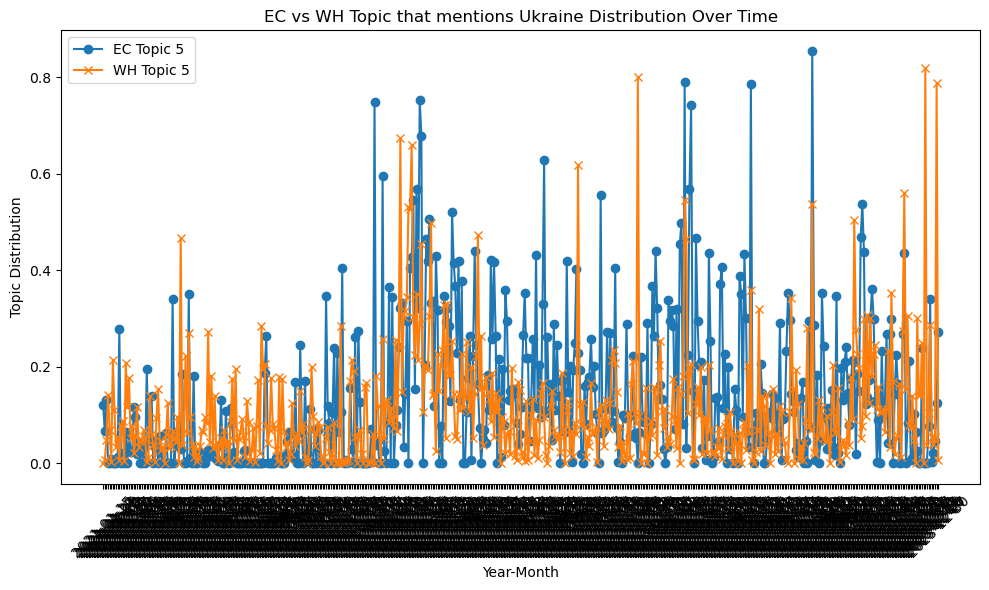

In [92]:
# Plotting ec_topic_5 vs wh_topic_5
plt.figure(figsize=(10, 6))
plt.plot(combined_daily_df['date'], combined_daily_df['ec_topic_5'], label='EC Topic 5', marker='o')
plt.plot(combined_daily_df['date'], combined_daily_df['wh_topic_5'], label='WH Topic 5', marker='x')
plt.title('EC vs WH Topic that mentions Ukraine Distribution Over Daily distribution')
plt.xlabel('Year-Month')
plt.ylabel('Topic Distribution')
plt.xticks(rotation=45)
plt.legend()
plt.tight_layout()
plt.show()